In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn as sk
import tensorflow as tf
import spacy
from tensorflow import keras
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
df1=pd.read_csv("sample_data/Youtube02-KatyPerry.csv");
df2=pd.read_csv("sample_data/Youtube01-Psy.csv");
df3=pd.read_csv("sample_data/Youtube03-LMFAO.csv");
df4=pd.read_csv("sample_data/Youtube04-Eminem.csv");
df5=pd.read_csv("sample_data/Youtube05-Shakira.csv");

In [ ]:
df1.head(4)

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z12pgdhovmrktzm3i23es5d5junftft3f,lekanaVEVO1,2014-07-22T15:27:50,i love this so much. AND also I Generate Free ...,1
1,z13yx345uxepetggz04ci5rjcxeohzlrtf4,Pyunghee,2014-07-27T01:57:16,http://www.billboard.com/articles/columns/pop-...,1
2,z12lsjvi3wa5x1vwh04cibeaqnzrevxajw00k,Erica Ross,2014-07-27T02:51:43,Hey guys! Please join me in my fight to help a...,1
3,z13jcjuovxbwfr0ge04cev2ipsjdfdurwck,Aviel Haimov,2014-08-01T12:27:48,http://psnboss.com/?ref=2tGgp3pV6L this is the...,1


In [ ]:
df2.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1


In [ ]:
df3.head(4)

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z13uwn2heqndtr5g304ccv5j5kqqzxjadmc0k,Corey Wilson,2015-05-28T21:39:52.376000,"<a href=""http://www.youtube.com/watch?v=KQ6zr6...",0
1,z124jvczaz3dxhnbc04cffk43oiugj25yzo0k,Epic Gaming,2015-05-28T20:07:20.610000,wierd but funny﻿,0
2,z13tczjy5xj0vjmu5231unho1ofey5zdk,LaS Music,2015-05-28T19:23:35.355000,"Hey guys, I&#39;m a human.<br /><br /><br />Bu...",1
3,z13tzr0hdpnayhqqc04cd3zqqqjkf3ngckk0k,Cheryl Fox,2015-05-28T17:49:35.294000,Party Rock....lol...who wants to shuffle!!!﻿,0


In [ ]:
df4.head(4)

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z12rwfnyyrbsefonb232i5ehdxzkjzjs2,Lisa Wellas,NaN,+447935454150 lovely girl talk to me xxx﻿,1
1,z130wpnwwnyuetxcn23xf5k5ynmkdpjrj04,jason graham,2015-05-29T02:26:10.652000,I always end up coming back to this song<br />﻿,0
2,z13vsfqirtavjvu0t22ezrgzyorwxhpf3,Ajkal Khan,NaN,"my sister just received over 6,500 new <a rel=...",1
3,z12wjzc4eprnvja4304cgbbizuved35wxcs,Dakota Taylor,2015-05-29T02:13:07.810000,Cool﻿,0


In [ ]:
df5.head(4)

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z13lgffb5w3ddx1ul22qy1wxspy5cpkz504,dharma pal,2015-05-29T02:30:18.971000,Nice song﻿,0
1,z123dbgb0mqjfxbtz22ucjc5jvzcv3ykj,Tiza Arellano,2015-05-29T00:14:48.748000,I love song ﻿,0
2,z12quxxp2vutflkxv04cihggzt2azl34pms0k,Prìñçeśś Âliś Łøvê Dømíñø Mâđiś™ ﻿,2015-05-28T21:00:08.607000,I love song ﻿,0
3,z12icv3ysqvlwth2c23eddlykyqut5z1h,Eric Gonzalez,2015-05-28T20:47:12.193000,"860,000,000 lets make it first female to reach...",0


In [ ]:
df=pd.concat([df1,df2,df3,df4,df5]);

In [ ]:
df.head(5)

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z12pgdhovmrktzm3i23es5d5junftft3f,lekanaVEVO1,2014-07-22T15:27:50,i love this so much. AND also I Generate Free ...,1
1,z13yx345uxepetggz04ci5rjcxeohzlrtf4,Pyunghee,2014-07-27T01:57:16,http://www.billboard.com/articles/columns/pop-...,1
2,z12lsjvi3wa5x1vwh04cibeaqnzrevxajw00k,Erica Ross,2014-07-27T02:51:43,Hey guys! Please join me in my fight to help a...,1
3,z13jcjuovxbwfr0ge04cev2ipsjdfdurwck,Aviel Haimov,2014-08-01T12:27:48,http://psnboss.com/?ref=2tGgp3pV6L this is the...,1
4,z13qybua2yfydzxzj04cgfpqdt2syfx53ms0k,John Bello,2014-08-01T21:04:03,Hey everyone. Watch this trailer!!!!!!!! http...,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1956 entries, 0 to 369
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   COMMENT_ID  1956 non-null   object
 1   AUTHOR      1956 non-null   object
 2   DATE        1711 non-null   object
 3   CONTENT     1956 non-null   object
 4   CLASS       1956 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 91.7+ KB


In [ ]:
df.drop(['COMMENT_ID','AUTHOR','DATE'],axis=1,inplace=True);

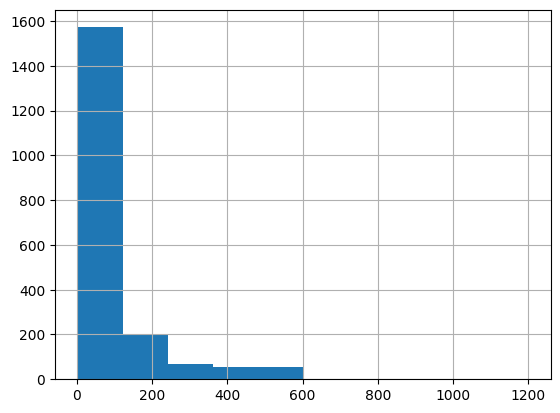

In [ ]:
df['CONTENT'].str.len().hist();

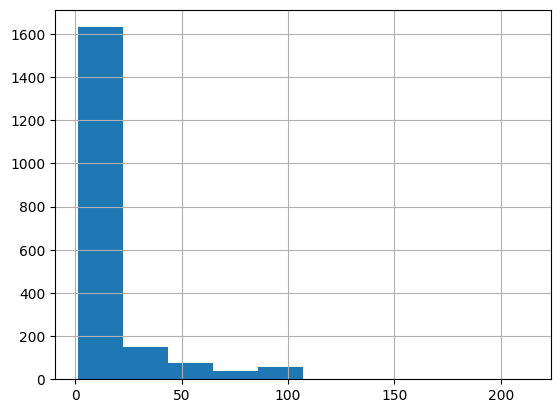

In [ ]:
df['CONTENT'].str.split().map(lambda x : len(x)).hist();

In [ ]:
nlp=spacy.load("en_core_web_sm");
import re

In [ ]:
def preprocess(text):
    # Removing white spaces
    text=re.sub(" +"," ",text);
   # Lowercasing the text
    text=text.lower();
    # Removing HTML tags from the text
    text=re.sub("<[^>]*>"," ",text);
    # Removing new lines from the text
    text=re.sub("\n"," ",text);
   # Removing punctuations,stop words and applying Lemmatization
    doc=nlp(text);
    filtered_tokens=[token.lemma_ for token in doc if not token.is_punct and not token.is_stop ];
    return " ".join(filtered_tokens);

In [ ]:
df['preprocessed']=df['CONTENT'].apply(preprocess)

In [ ]:
df['preprocessed']=df['preprocessed'].apply(lambda x:re.sub(r'^http?:\/\/.*[\r\n]*', ' ', x, flags=re.MULTILINE))

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


In [ ]:
def get_top_ngrams(text,n):
    vectorizer=CountVectorizer(ngram_range=(n,n));
    bow=vectorizer.fit_transform(text);
    sum_words=bow.sum(axis=0);
    word_freq=[(word,sum_words[0,idx]) for word,idx in vectorizer.vocabulary_.items()];
    word_freq=sorted(word_freq,key=lambda x:x[1],reverse=True);
    return word_freq[:20];


In [ ]:
import seaborn as sns

In [ ]:
ham=df[df['CLASS']==0];
bigrams=get_top_ngrams(ham['preprocessed'],2);
x,y=map(list,zip(*bigrams));

<Axes: >

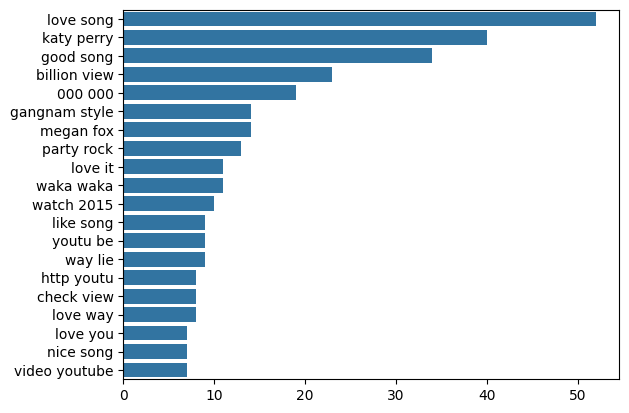

In [ ]:
sns.barplot(x=y,y=x)

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig

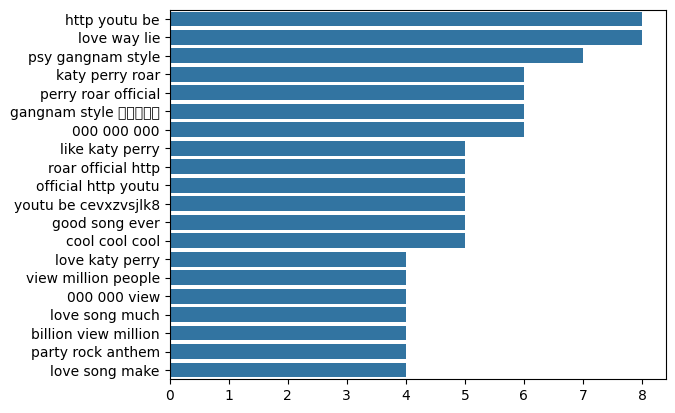

In [ ]:
trigrams=get_top_ngrams(ham['preprocessed'],3);
x,y=map(list,zip(*trigrams));
sns.barplot(x=y,y=x);

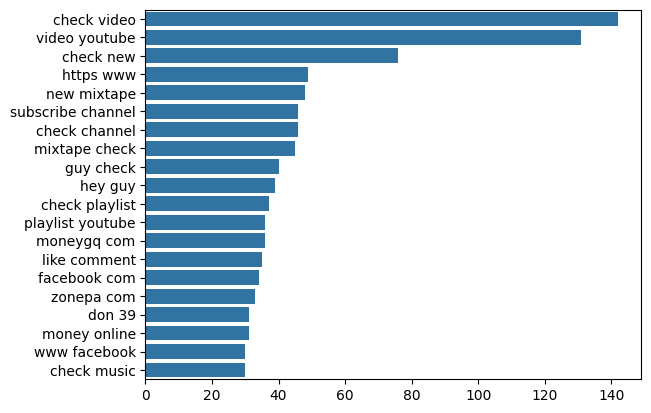

In [ ]:
spam=df[df['CLASS']==1];
spam_bigrams=get_top_ngrams(spam['preprocessed'],2);
x,y=map(list,zip(*spam_bigrams));
sns.barplot(x=y,y=x);

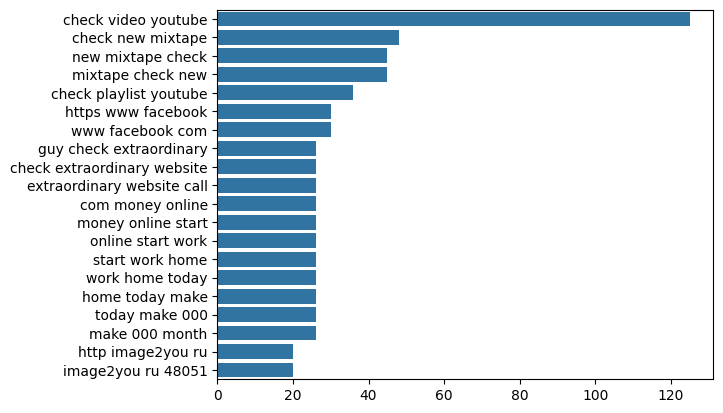

In [ ]:
spam_trigrams=get_top_ngrams(spam['preprocessed'],3);
x,y=map(list,zip(*spam_trigrams));
sns.barplot(x=y,y=x);

In [ ]:
#ham classifier to identify spam messages
ham=df[df['CLASS']==0];

ham=ham['preprocessed'].values.tolist();

In [ ]:
ham=" ".join(ham);

In [ ]:
spam=spam['preprocessed'].values.tolist();
spam=" ".join(spam);

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

In [ ]:
def get_top_adjectives(text):

    nlp=spacy.load('en_core_web_sm');
    doc=nlp(text);
    # Getting the text of token if the token is tagged as an adjective and is not a punctuation mark and stop word
    adjectives=[token.text for token in doc if token.pos_ =="ADJ" and not token.is_punct and not token.is_stop];
    # Getting  a single string out of the list of all adjectives
    adjectives=" ".join(adjectives);
    # Getting 10 most common adjectives
    most_common=Counter(adjectives.split()).most_common(10);
    return most_common

In [ ]:
ham_adjectives=get_top_adjectives(ham)

In [ ]:
x,y=map(list,zip(*ham_adjectives));

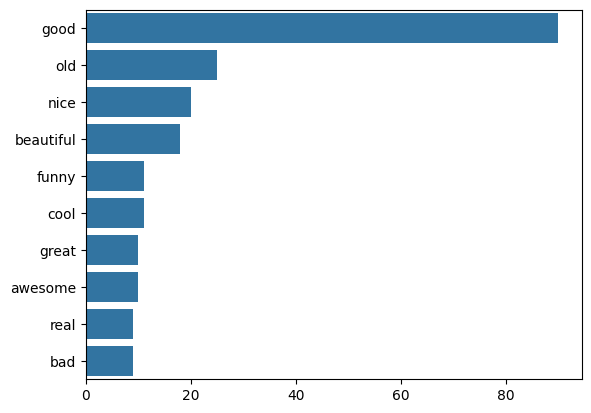

In [ ]:
sns.barplot(x=y,y=x);

In [ ]:
spam_adjectives=get_top_adjectives(spam);
x,y=map(list,zip(*spam_adjectives));

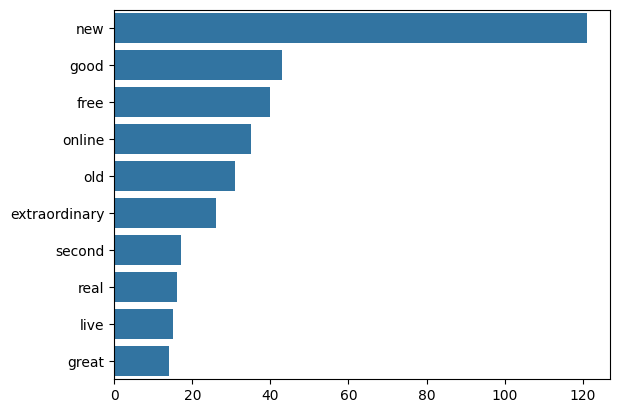

In [ ]:
sns.barplot(x=y,y=x);

In [ ]:
def get_top_verbs(text):

    nlp=spacy.load('en_core_web_sm');
    doc=nlp(text);
    # Getting the text of token if the token is tagged as an adjective and is not a punctuation mark and stop word
    verbs=[token.text for token in doc if token.pos_ =="VERB" and not token.is_punct and not token.is_stop];
    # Getting  a single string out of the list of all adjectives
    verbs=" ".join(verbs);
    # Getting 10 most common adjectives
    most_common=Counter(verbs.split()).most_common(10);
    return most_common

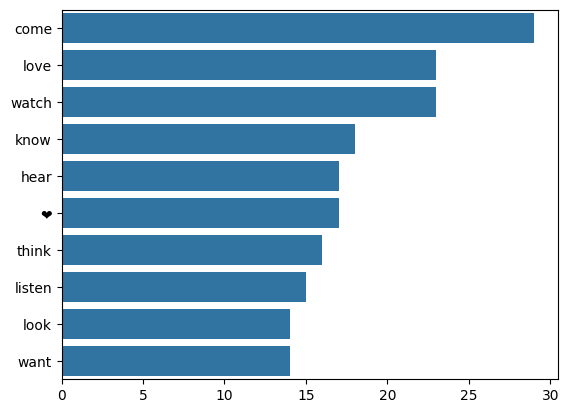

In [ ]:
ham_verbs=get_top_verbs(ham);
x,y=map(list,zip(*ham_verbs));
sns.barplot(x=y,y=x);

<Axes: >

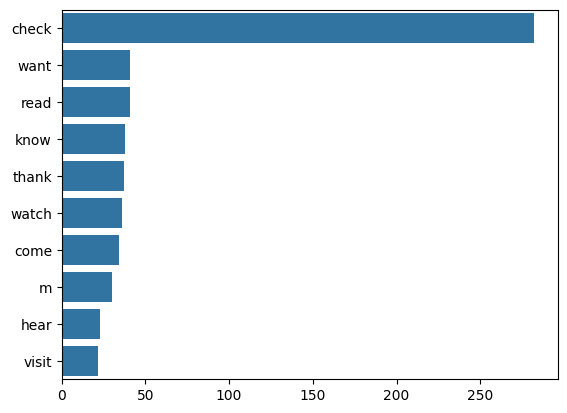

In [ ]:
spam_verbs=get_top_verbs(spam);
x,y=map(list,zip(*spam_verbs));
sns.barplot(x=y,y=x)

In [ ]:
from textblob import TextBlob

Sentiment Analysis

In [ ]:
#sentiment analysis to done to check whether message is +ve,-ve or neutral
def polarity(text):
    return TextBlob(text).sentiment.polarity;

In [ ]:
df['polarity']=df['preprocessed'].apply(polarity);

<Axes: >

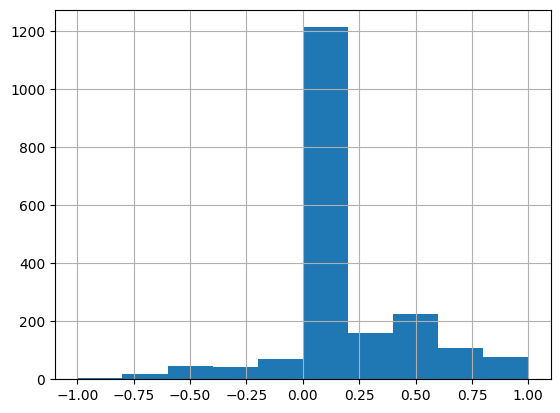

In [ ]:
df['polarity'].hist()

In [ ]:
def sentiment(x):
    if(x==0):
        return 'neutral';
    elif(x>0):
        return 'positive';
    else:
        return 'negative';

In [ ]:
df['sentiment']=df['polarity'].apply(sentiment);

In [ ]:
ham_df=df[df['CLASS']==0];
spam_df=df[df['CLASS']==1];

In [ ]:
ham_txt_sentiment=ham_df['sentiment'].value_counts();

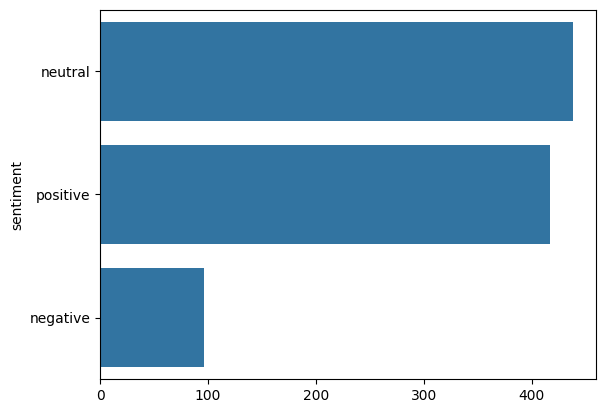

In [ ]:
sns.barplot(x=ham_txt_sentiment.values,y=ham_txt_sentiment.index);

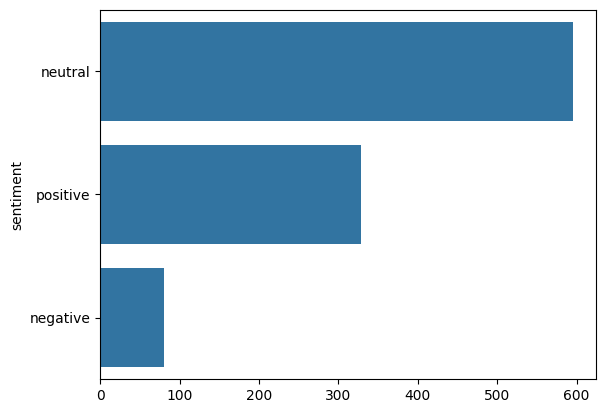

In [ ]:
spam_txt_sentiment=spam_df['sentiment'].value_counts();
sns.barplot(x=spam_txt_sentiment.values,y=spam_txt_sentiment.index);

In [ ]:
# One hot encoding the labels
#categorical variables into numerical form
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder=LabelEncoder();
labels=encoder.fit_transform(df['CLASS']);

In [ ]:
features=df['preprocessed'];

In [ ]:
#to check how model performs on new dataset
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(features,labels,test_size=0.1,random_state=1000)

In [ ]:
#combines output of multiple decison tree into single one
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC;
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#shows a representation of the main classification metrics on a per-class basis
#a table that is used to define the performance of a classification algorithm
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
multinomial_nb=Pipeline([
    ('vectorizer',TfidfVectorizer()),
    ('model',MultinomialNB())
])

In [ ]:
#classification with discrete features such as word count
multinomial_nb.fit(X_train,Y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()), ('model', MultinomialNB())])

In [ ]:
y_pred_multinomial=multinomial_nb.predict(X_test);

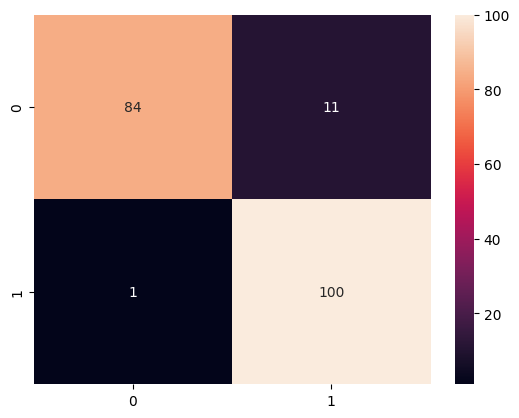

In [ ]:
cm_multinomial=confusion_matrix(Y_test,y_pred_multinomial);
sns.heatmap(cm_multinomial,annot=True,fmt='d');

In [ ]:
cr_multinomial=classification_report(Y_test,y_pred_multinomial);
print(cr_multinomial)

              precision    recall  f1-score   support

           0       0.99      0.88      0.93        95
           1       0.90      0.99      0.94       101

    accuracy                           0.94       196
   macro avg       0.94      0.94      0.94       196
weighted avg       0.94      0.94      0.94       196



In [ ]:
#supervised vector machine or ML which is used for classification and regression
svm=Pipeline([
    ('vectorizer',TfidfVectorizer()),
    ('model',SVC(C=1.01,kernel='linear'))
])

In [ ]:
svm.fit(X_train,Y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('model', SVC(C=1.01, kernel='linear'))])

<Axes: >

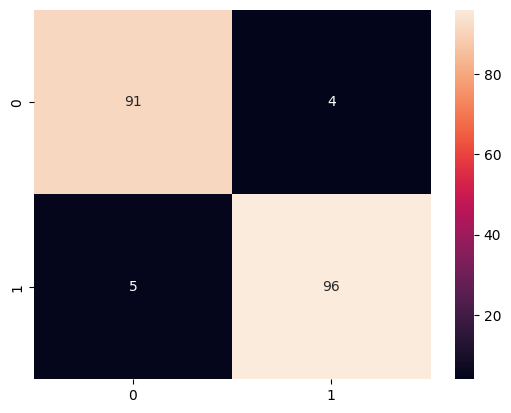

In [ ]:
#heatmap b/w confusion matrix and svm
y_pred_svm=svm.predict(X_test);
cm_svm=confusion_matrix(Y_test,y_pred_svm);
sns.heatmap(cm_svm,annot=True,fmt='d')

In [ ]:
cr_svm=classification_report(Y_test,y_pred_svm);
print(cr_svm);

              precision    recall  f1-score   support

           0       0.95      0.96      0.95        95
           1       0.96      0.95      0.96       101

    accuracy                           0.95       196
   macro avg       0.95      0.95      0.95       196
weighted avg       0.95      0.95      0.95       196



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gradientBoosting=Pipeline([
    ('vector',TfidfVectorizer()),
    ('model',GradientBoostingClassifier())
])

In [ ]:
#based on idea derived from decision tree
gradientBoosting.fit(X_train,Y_train)

Pipeline(steps=[('vector', TfidfVectorizer()),
                ('model', GradientBoostingClassifier())])

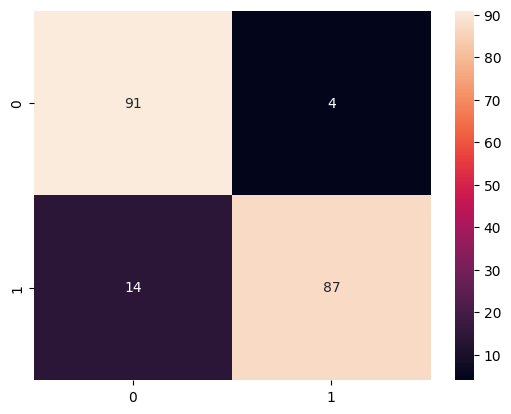

In [ ]:
y_pred_gb=gradientBoosting.predict(X_test);
cm_gb=confusion_matrix(Y_test,y_pred_gb);
sns.heatmap(cm_gb,annot=True,fmt='d');